In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [43]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [44]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [45]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f037715e7bb4c5078ff2e094a67b7a22


In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [51]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jaguaribe
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | sergeyevka
Processing Record 6 of Set 1 | evensk
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | pangkalanbuun
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | burica
City not found. Skipping...
Processing Record 16 of Set 1 | wembley
Processing Record 17 of Set 1 | parlakimidi
Processing Record 18 of Set 1 | morondava
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | albany
Processing Record 22 of

Processing Record 38 of Set 4 | igarka
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | apartado
Processing Record 41 of Set 4 | bend
Processing Record 42 of Set 4 | at-bashi
Processing Record 43 of Set 4 | dzhebariki-khaya
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | ucar
Processing Record 46 of Set 4 | alice town
Processing Record 47 of Set 4 | nabire
Processing Record 48 of Set 4 | malazgirt
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | meadow lake
Processing Record 1 of Set 5 | khawhai
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | iriron
City not found. Skipping...
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | manakara
Processing Record 6 of Set 5 | santa cruz de tenerife
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | huayucachi
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of 

Processing Record 26 of Set 8 | genhe
Processing Record 27 of Set 8 | filadelfia
Processing Record 28 of Set 8 | mulanje
Processing Record 29 of Set 8 | longyearbyen
Processing Record 30 of Set 8 | springbok
Processing Record 31 of Set 8 | half moon bay
Processing Record 32 of Set 8 | khasan
Processing Record 33 of Set 8 | asfi
Processing Record 34 of Set 8 | cruz alta
Processing Record 35 of Set 8 | dakar
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | tommot
Processing Record 38 of Set 8 | haines junction
Processing Record 39 of Set 8 | arraial do cabo
Processing Record 40 of Set 8 | hisar
Processing Record 41 of Set 8 | barcelos
Processing Record 42 of Set 8 | dunda
Processing Record 43 of Set 8 | artyk
City not found. Skipping...
Processing Record 44 of Set 8 | paterson
Processing Record 45 of Set 8 | axim
Processing Record 46 of Set 8 | ishinomaki
Processing Record 47 of Set 8 | kashan
Processing Record 48 of Set 8 | dingli
Processing Record 49 of Set 8 |

Processing Record 13 of Set 12 | barawe
City not found. Skipping...
Processing Record 14 of Set 12 | zhigansk
Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | gabu
Processing Record 17 of Set 12 | lensk
Processing Record 18 of Set 12 | dudinka
Processing Record 19 of Set 12 | vaike-maarja
Processing Record 20 of Set 12 | jasper
Processing Record 21 of Set 12 | garcia
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | matara
Processing Record 24 of Set 12 | kachikau
City not found. Skipping...
Processing Record 25 of Set 12 | aksarka
Processing Record 26 of Set 12 | ballina
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | san cristobal
Processing Record 29 of Set 12 | omsukchan
Processing Record 30 of Set 12 | lodja
Processing Record 31 of Set 12 | port hardy
Processing Record 32 of Set 12 | danilov
Processing Record 33 of Set 12 | creston
Processing Record 34 of Set 12 | longlac
City not found. Skipping...
Processing 

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jaguaribe,-5.8906,-38.6219,91.26,39,18,6.69,BR,2021-08-12 13:32:54
1,Yellowknife,62.4560,-114.3525,48.72,100,75,4.61,CA,2021-08-12 13:32:55
2,Husavik,66.0449,-17.3389,57.11,83,95,7.36,IS,2021-08-12 13:32:55
3,Mataura,-46.1927,168.8643,45.48,98,23,2.37,NZ,2021-08-12 13:32:55
4,Sergeyevka,53.8800,67.4158,64.44,45,0,13.65,KZ,2021-08-12 13:32:55
5,Evensk,61.9500,159.2333,47.53,95,90,2.95,RU,2021-08-12 13:32:56
6,Asau,46.4333,26.4000,77.76,71,44,4.94,RO,2021-08-12 13:32:56
7,Hermanus,-34.4187,19.2345,59.90,64,35,13.33,ZA,2021-08-12 13:32:56
8,Port Alfred,-33.5906,26.8910,54.54,76,100,13.91,ZA,2021-08-12 13:32:56
9,Rikitea,-23.1203,-134.9692,73.98,81,100,16.15,PF,2021-08-12 13:32:57


In [54]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jaguaribe,BR,2021-08-12 13:32:54,-5.8906,-38.6219,91.26,39,18,6.69
1,Yellowknife,CA,2021-08-12 13:32:55,62.4560,-114.3525,48.72,100,75,4.61
2,Husavik,IS,2021-08-12 13:32:55,66.0449,-17.3389,57.11,83,95,7.36
3,Mataura,NZ,2021-08-12 13:32:55,-46.1927,168.8643,45.48,98,23,2.37
4,Sergeyevka,KZ,2021-08-12 13:32:55,53.8800,67.4158,64.44,45,0,13.65
5,Evensk,RU,2021-08-12 13:32:56,61.9500,159.2333,47.53,95,90,2.95
6,Asau,RO,2021-08-12 13:32:56,46.4333,26.4000,77.76,71,44,4.94
7,Hermanus,ZA,2021-08-12 13:32:56,-34.4187,19.2345,59.90,64,35,13.33
8,Port Alfred,ZA,2021-08-12 13:32:56,-33.5906,26.8910,54.54,76,100,13.91
9,Rikitea,PF,2021-08-12 13:32:57,-23.1203,-134.9692,73.98,81,100,16.15


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628776194.3287106

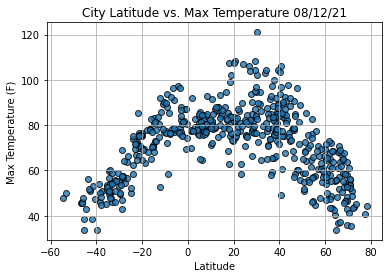

In [58]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

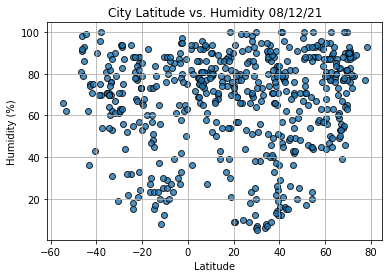

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

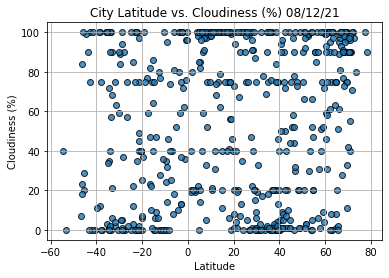

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

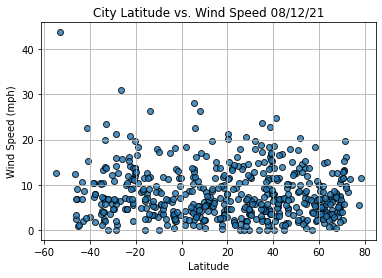

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()